## Perform standard imports and load the dataset

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv(r'F:\DATA Competition L and T\train_Data.csv',index_col=0,parse_dates=True)
df.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


## Plot the Dataset

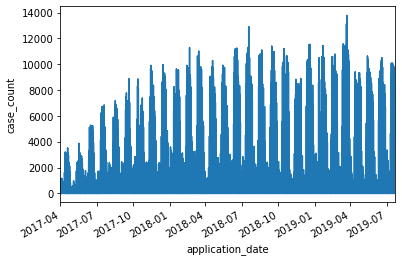

In [6]:
ax = df['case_count'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='case_count');

## Using stat models get the treands

In [10]:
#Hodrick-Prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter   

# Tuple unpacking
count_cycle, count_trend = hpfilter(df['case_count'], lamb=129600)
'''
The 𝜆 value above handles variations in the growth rate of the trend component.
When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.
'''

'\nThe 𝜆 value above handles variations in the growth rate of the trend component.\nWhen analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.\n'

In [11]:
count_cycle

application_date
2017-04-01    -41.074606
2017-04-03    -77.078133
2017-04-04    -79.081343
2017-04-05     28.916676
2017-04-07     -9.082555
                 ...    
2019-07-19    463.615018
2019-07-20     49.358917
2019-07-21   -410.913946
2019-07-22    498.801187
2019-07-23    528.512242
Name: case_count, Length: 80402, dtype: float64

In [12]:
type(count_cycle)

pandas.core.series.Series

In [13]:
df['trend'] = count_trend

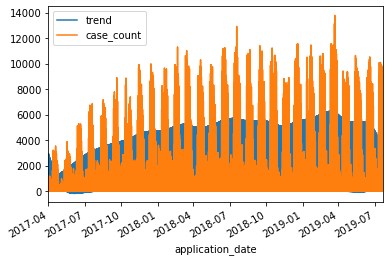

In [14]:
df[['trend','case_count']].plot().autoscale(axis='x',tight=True);

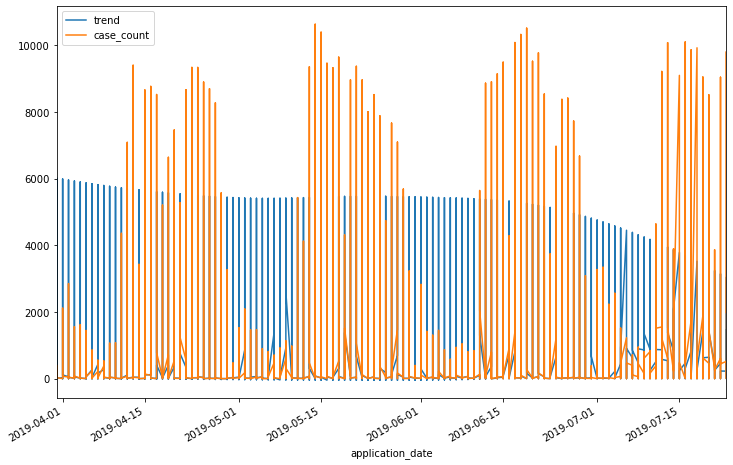

In [15]:
df[['trend','case_count']]['2019-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## ETS (Error, Treand and seasonality Model)
### The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS). We've already seen a simplistic example of this in the Introduction to Statsmodels section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

## Seasonal Decomposition

In [112]:
# read file 
df= pd.read_csv(r'F:\DATA Competition L and T\train_Data.csv',index_col=0,parse_dates=True)

In [113]:
df.dropna(inplace=True)

In [114]:
df.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [96]:
df.shape

(66898, 5)

Seasonal Decomposition is fail for the 0 and negative data thats why i skip this step or probabaly we will trasnform this data later

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

# (SMA) Simple moving avarage

In [120]:
df['6-month-SMA'] = df['case_count'].rolling(window=6).mean()
df['12-month-SMA'] = df['case_count'].rolling(window=12).mean()

In [110]:
df.head()

,case_count,6-month-SMA,12-month-SMA,EWMA12
application_date,,,,
2017-04-01,40.000000,NaN,NaN,40.000000
2017-04-03,34.615385,NaN,NaN,39.171598
2017-04-04,29.905325,NaN,NaN,37.746017
2017-04-05,42.689122,NaN,NaN,38.506495
2017-04-07,47.813872,NaN,NaN,39.938399


In [111]:
df=df[['case_count','6-month-SMA','12-month-SMA']]

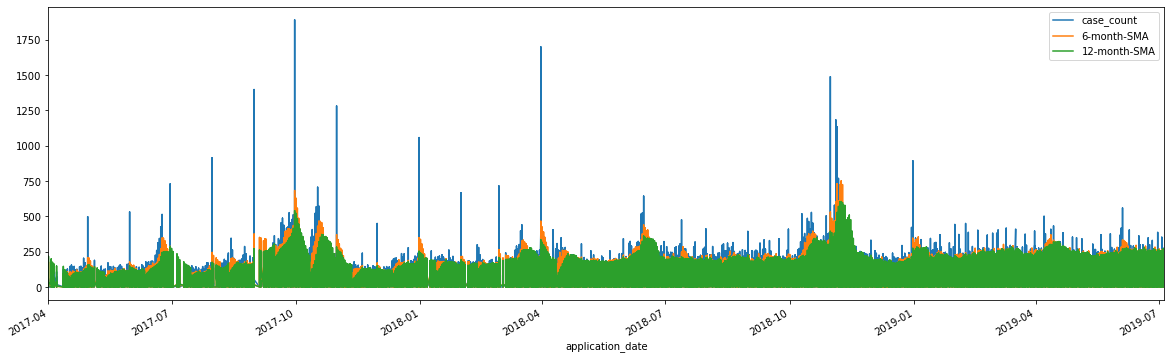

In [105]:
df.plot()

# (EWMA) Exponential Weighted Moving Average 

In [117]:
df['EWMA12'] = df['case_count'].ewm(span=12,adjust=False).mean()

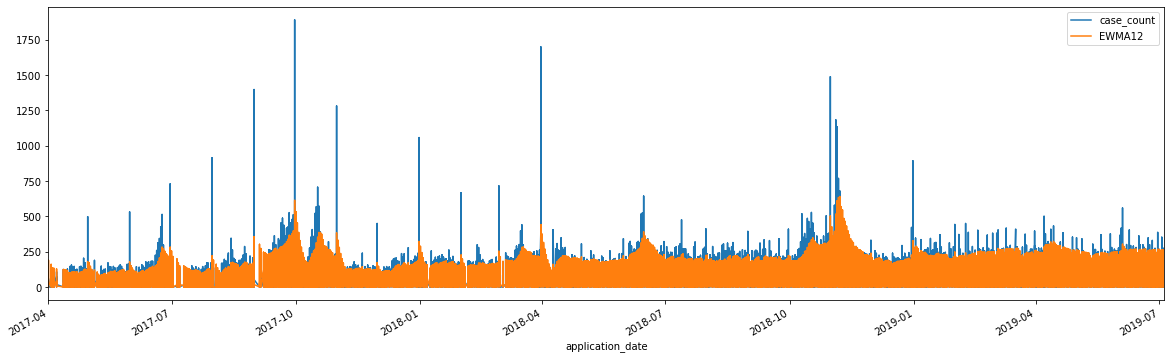

In [118]:
df[['case_count','EWMA12']].plot();

# Comparing SMA EWMA 

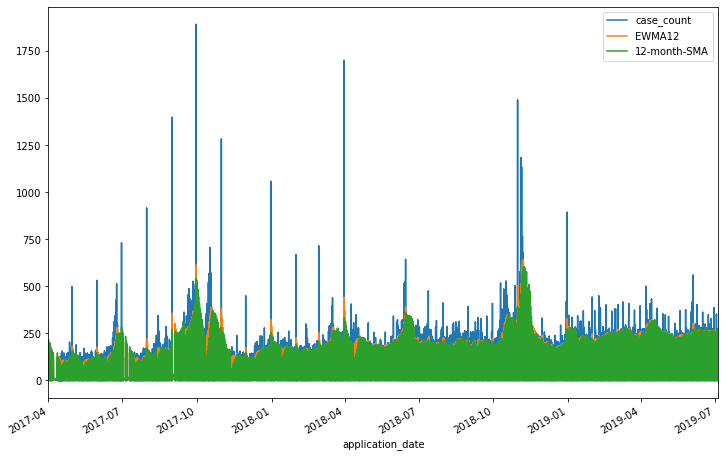

In [121]:
df[['case_count','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);